In [1]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
# Import order product dataset
df = pd.read_csv('order_products.csv', usecols=['order_id', 'product_id'])
df.head()

,order_id,product_id
0,10,24
1,10,83
2,10,16
3,10,24
4,10,83


In [3]:
# Import product label mapping
products = pd.read_csv('products.csv')
products.head()

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals
4,5,13,marinades meat preparation


In [4]:
# Merge product labels
df = pd.merge(df, products, how='left', on='product_id').\
    drop(["product_id", "department_id"], axis=1)
df.head()

,order_id,product_name
0,10,fresh fruits
1,10,fresh vegetables
2,10,fresh herbs
3,10,fresh fruits
4,10,fresh vegetables


In [5]:
# Get modes and unique values
df.astype(object).describe()

,order_id,product_name
count,1048575,1048575
unique,103762,134
top,790903,fresh fruits
freq,137,117784


In [6]:
# Check product frequencies
df['product_name'].value_counts()

fresh fruits                  117784
fresh vegetables              110286
packaged vegetables fruits     56748
yogurt                         47566
packaged cheese                32085
                               ...  
eye ear care                     273
baby bath body care              268
baby accessories                 243
beauty                           157
frozen juice                     143
Name: product_name, Length: 134, dtype: int64

In [7]:
# Pivot the data - lines as orders and products as columns
pt = pd.pivot_table(df, index='order_id', columns='product_name', 
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
pt.head()

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Support

In [8]:
# Apply the APRIORI algorithm to get frequent itemsets
# Rules supported in at least 5% of the transactions (more info at http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
frequent_itemsets = apriori(pt, min_support=0.05, use_colnames=True)
top10=frequent_itemsets.sort_values(by='support', ascending=False).head(10)
top10

,support,itemsets
18,0.557642,(fresh fruits)
20,0.444045,(fresh vegetables)
36,0.366685,(packaged vegetables fruits)
77,0.318064,"(fresh vegetables, fresh fruits)"
87,0.270783,"(packaged vegetables fruits, fresh fruits)"
48,0.264442,(yogurt)
30,0.243991,(milk)
102,0.234517,"(packaged vegetables fruits, fresh vegetables)"
34,0.231848,(packaged cheese)
47,0.193751,(water seltzer sparkling water)


### Top10 itemsets plot

In [9]:
top10['itemsets'] = [','.join(list(x)) for x in top10['itemsets']]

Text(0, 0.5, 'Itemsets')

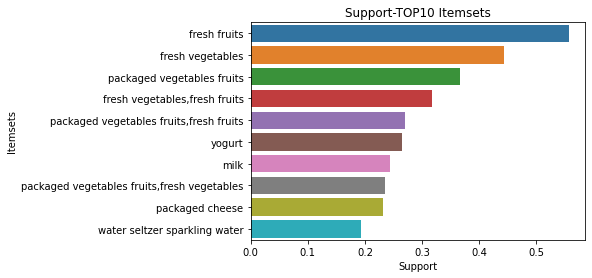

In [10]:
ax = sns.barplot(x=list(top10.support), y=list(top10.itemsets))

plt.title('Support-TOP10 Itemsets')
# Set x-axis label
plt.xlabel('Support')
# Set y-axis label
plt.ylabel('Itemsets')

In [11]:
tbnocom_10=tbnocom.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=list(top10.support), y=list(top10.itemsets), alpha=0.8, color='gray')
plt.ylabel('Itemsets', fontsize=12)
plt.xlabel('Support', fontsize=12)
plt.title("Support-TOP10 Itemsets", fontsize=15)
plt.show()

NameError: name 'tbnocom' is not defined

# Confidence

In [12]:
# Generate the association rules - by confidence
rulesConfidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.50)
rulesConfidence.sort_values(by='confidence', ascending=False, inplace=True)
rulesConfidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(fresh herbs, fresh fruits)",(fresh vegetables),0.071134,0.444045,0.062595,0.879962,1.981696,0.031008,4.631494
124,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.087624,0.557642,0.075635,0.863176,1.547906,0.026772,3.233057
114,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.072917,0.557642,0.062798,0.861221,1.544399,0.022136,3.187509
35,(fresh herbs),(fresh vegetables),0.093666,0.444045,0.079085,0.844326,1.901441,0.037493,3.571267
119,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.082516,0.557642,0.068638,0.831815,1.491666,0.022624,2.630190
...,...,...,...,...,...,...,...,...,...
78,(packaged vegetables fruits),"(fresh vegetables, fresh fruits)",0.366685,0.318064,0.186378,0.508279,1.598038,0.069749,1.386834
70,(frozen produce),"(fresh vegetables, fresh fruits)",0.123138,0.318064,0.062258,0.505596,1.589603,0.023092,1.379308
123,"(fresh vegetables, packaged cheese)","(packaged vegetables fruits, fresh fruits)",0.136119,0.270783,0.068638,0.504248,1.862184,0.031779,1.470931
11,(eggs),(packaged vegetables fruits),0.136938,0.366685,0.068888,0.503061,1.371916,0.018675,1.274433


### Pie Plot-Consequents

In [13]:
consequent_piechart=pd.DataFrame(rulesConfidence.consequents.value_counts())
consequent_piechart.index = [','.join(list(x)) for x in consequent_piechart.index]
consequent_piechart

,consequents
fresh fruits,54
fresh vegetables,39
packaged vegetables fruits,27
"fresh vegetables,fresh fruits",6
"packaged vegetables fruits,fresh fruits",3


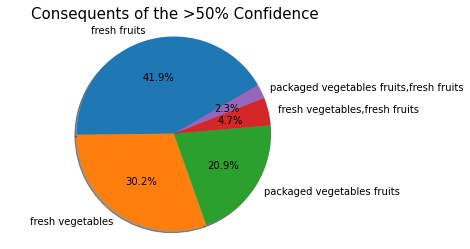

In [14]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = consequent_piechart.index
sizes = consequent_piechart.consequents


fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Consequents of the >50% Confidence', size=15)
plt.show()

### Network of confidences 

In [15]:
### Plot a basic network graph of the top 50 confidence rules
# Create a copy of the rules and transform the frozensets to strings
rulesToPlot = rulesConfidence.copy(deep=True)
rulesToPlot['LHS'] = [','.join(list(x)) for x in rulesToPlot['antecedents']]
rulesToPlot['RHS'] = [','.join(list(x)) for x in rulesToPlot['consequents']]
# Remove duplicate if reversed rules
rulesToPlot['sortedRow'] = [sorted([a,b]) for a,b in zip(rulesToPlot.LHS, rulesToPlot.RHS)]
rulesToPlot['sortedRow'] = rulesToPlot['sortedRow'].astype(str)
rulesToPlot.drop_duplicates(subset=['sortedRow'], inplace=True)


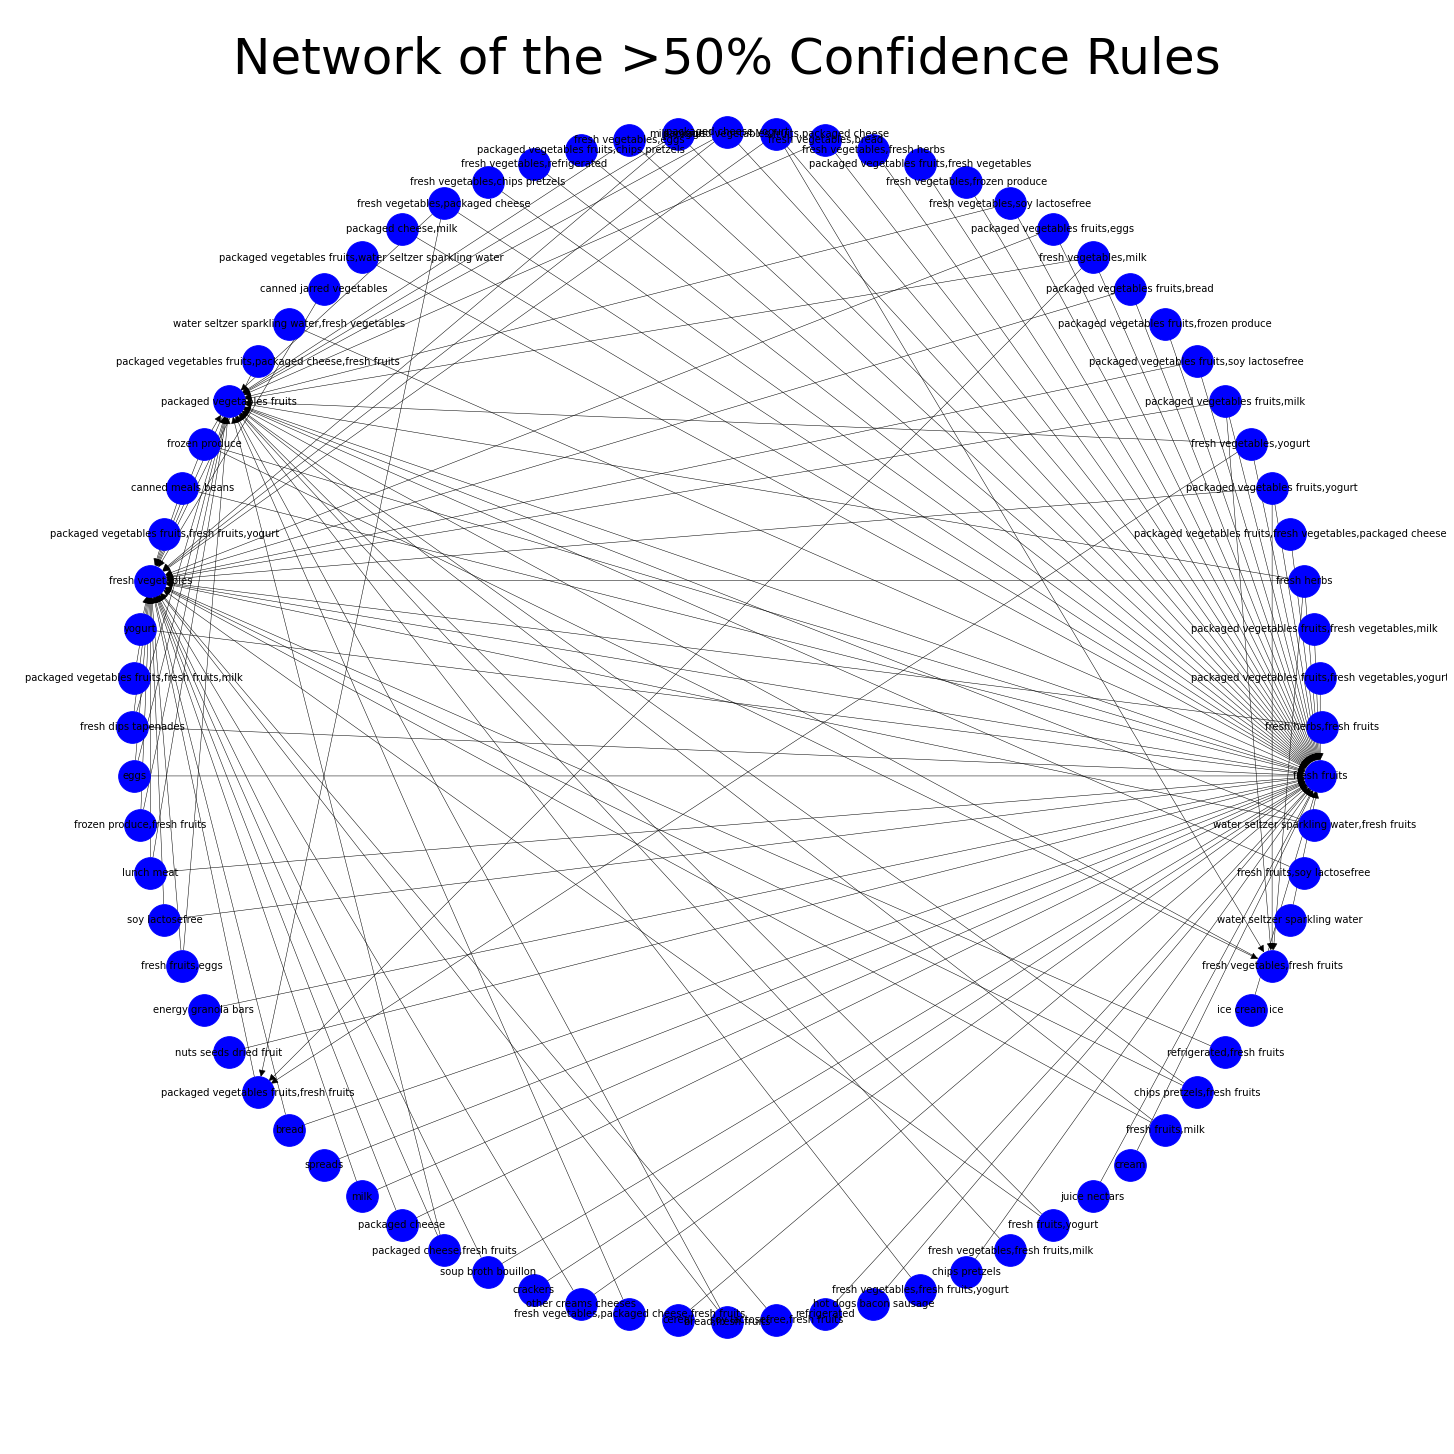

In [31]:
import networkx as nx
from networkx import draw_networkx_labels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) 
G = nx.DiGraph()
for i in rulesToPlot['LHS']:
    G.add_node(i, node_color="red")
for i in rulesToPlot['RHS']:
    if i not in rulesToPlot['LHS']:
        G.add_node(i, node_color="red")
q=rulesToPlot[['LHS','RHS']].to_numpy()
G.add_edges_from(q)

options = {
    'width': 0.5,
    'arrowstyle': '-|>',
    'arrowsize': 15,
    }
nx.draw(G,with_labels=True,node_size=1000, node_color="blue",arrows=True,pos=nx.circular_layout(G),font_size=10,**options)
fig.suptitle('Network of the >50% Confidence Rules',fontsize=50)
plt.axis('equal')
plt.show()

# Lift

In [17]:
# Generate the association rules - by lift
rulesLift = association_rules(frequent_itemsets, metric="lift")
rulesLift.sort_values(by='lift', ascending=False, inplace=True)
rulesLift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
196,(fresh herbs),"(fresh vegetables, fresh fruits)",0.093666,0.318064,0.062595,0.668279,2.101080,0.032803,2.055748
193,"(fresh vegetables, fresh fruits)",(fresh herbs),0.318064,0.093666,0.062595,0.196800,2.101080,0.032803,1.128404
195,(fresh vegetables),"(fresh herbs, fresh fruits)",0.444045,0.071134,0.062595,0.140966,1.981696,0.031008,1.081291
194,"(fresh herbs, fresh fruits)",(fresh vegetables),0.071134,0.444045,0.062595,0.879962,1.981696,0.031008,4.631494
384,"(fresh vegetables, yogurt)","(packaged vegetables fruits, fresh fruits)",0.143868,0.270783,0.075635,0.525723,1.941493,0.036678,1.537535


<AxesSubplot:xlabel='confidence', ylabel='lift'>

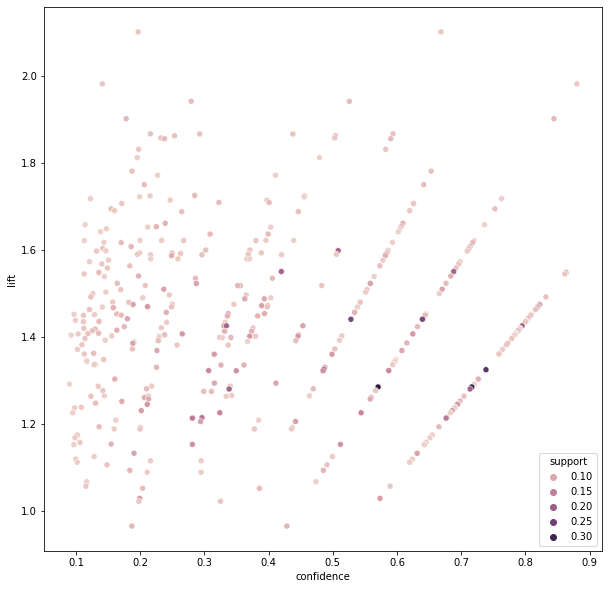

In [18]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(data=rulesLift, x="confidence", y="lift", hue="support")

# Substitute Goods

In [19]:
# If a client buys a certain product, probability of buying the substitute product decreases. Therefore, the lift 
#must be below zero.
rulesLift[rulesLift['lift'] <= 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
114,(water seltzer sparkling water),(fresh vegetables),0.193751,0.444045,0.082988,0.428323,0.964593,-0.003046,0.972498
115,(fresh vegetables),(water seltzer sparkling water),0.444045,0.193751,0.082988,0.186891,0.964593,-0.003046,0.991563


# Complementary products

In [20]:
w=rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1)].sort_values(by='support',ascending=False).head(10)
w['antecedents']=[','.join(list(x)) for x in w['antecedents']]
w['consequents']=[','.join(list(x)) for x in w['consequents']]
w['relation']=w[['antecedents','consequents']].agg('->'.join, axis=1)
w

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,relation
17,fresh vegetables,fresh fruits,0.444045,0.557642,0.318064,0.716289,1.284497,0.070446,1.559185,fresh vegetables->fresh fruits
28,packaged vegetables fruits,fresh fruits,0.366685,0.557642,0.270783,0.738462,1.324259,0.066304,1.691373,packaged vegetables fruits->fresh fruits
34,yogurt,fresh fruits,0.264442,0.557642,0.188730,0.713692,1.279840,0.041266,1.545045,yogurt->fresh fruits
75,"packaged vegetables fruits,fresh vegetables",fresh fruits,0.234517,0.557642,0.186378,0.794732,1.425166,0.055602,2.155025,"packaged vegetables fruits,fresh vegetables->f..."
85,"fresh vegetables,yogurt",fresh fruits,0.143868,0.557642,0.117876,0.819333,1.469282,0.037649,2.448471,"fresh vegetables,yogurt->fresh fruits"
100,"packaged vegetables fruits,yogurt",fresh fruits,0.128168,0.557642,0.105366,0.822092,1.474230,0.033894,2.486444,"packaged vegetables fruits,yogurt->fresh fruits"
73,"fresh vegetables,packaged cheese",fresh fruits,0.136119,0.557642,0.105106,0.772161,1.384690,0.029200,1.941539,"fresh vegetables,packaged cheese->fresh fruits"
71,"fresh vegetables,milk",fresh fruits,0.124872,0.557642,0.100364,0.803735,1.441312,0.030730,2.253889,"fresh vegetables,milk->fresh fruits"
93,"packaged vegetables fruits,packaged cheese",fresh fruits,0.115611,0.557642,0.091238,0.789180,1.415210,0.026768,2.098273,"packaged vegetables fruits,packaged cheese->fr..."
19,frozen produce,fresh fruits,0.123138,0.557642,0.089455,0.726462,1.302739,0.020788,1.617171,frozen produce->fresh fruits


Text(0, 0.5, 'Complementary relations')

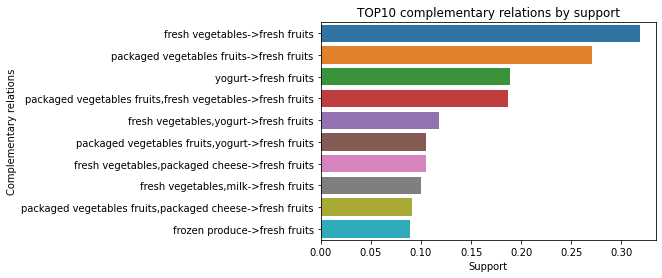

In [21]:
ax = sns.barplot(x=list(w['support']), y=list(w['relation']))

plt.title('TOP10 complementary relations by support')
# Set x-axis label
plt.xlabel('Support')
# Set y-axis label
plt.ylabel('Complementary relations')

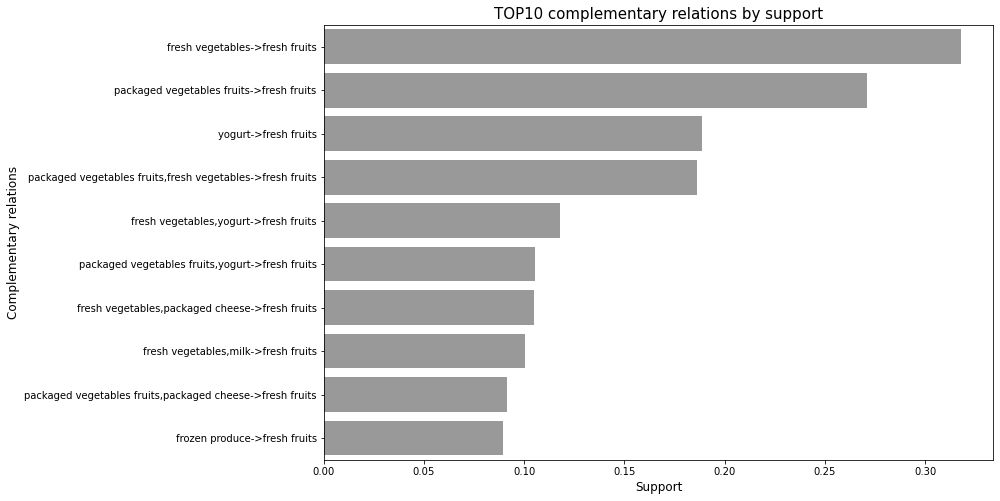

In [24]:
#tbnocom_10=tbnocom.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=list(w['support']), y=list(w['relation']), alpha=0.8, color='gray')
plt.ylabel('Complementary relations', fontsize=12)
plt.xlabel('Support', fontsize=12)
plt.title("TOP10 complementary relations by support", fontsize=15)
plt.show()

# No complementary products

In [25]:
complements_prod=rulesConfidence[(rulesConfidence['confidence'] >= 0.7) & (rulesConfidence['lift'] >= 1)]
complements_prod

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(fresh herbs, fresh fruits)",(fresh vegetables),0.071134,0.444045,0.062595,0.879962,1.981696,0.031008,4.631494
124,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.087624,0.557642,0.075635,0.863176,1.547906,0.026772,3.233057
114,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.072917,0.557642,0.062798,0.861221,1.544399,0.022136,3.187509
35,(fresh herbs),(fresh vegetables),0.093666,0.444045,0.079085,0.844326,1.901441,0.037493,3.571267
119,"(packaged vegetables fruits, fresh vegetables,...",(fresh fruits),0.082516,0.557642,0.068638,0.831815,1.491666,0.022624,2.630190
100,"(packaged vegetables fruits, yogurt)",(fresh fruits),0.128168,0.557642,0.105366,0.822092,1.474230,0.033894,2.486444
85,"(fresh vegetables, yogurt)",(fresh fruits),0.143868,0.557642,0.117876,0.819333,1.469282,0.037649,2.448471
90,"(packaged vegetables fruits, milk)",(fresh fruits),0.107824,0.557642,0.088202,0.818019,1.466927,0.028075,2.430799
96,"(packaged vegetables fruits, soy lactosefree)",(fresh fruits),0.082651,0.557642,0.067414,0.815648,1.462675,0.021324,2.399536
87,"(packaged vegetables fruits, frozen produce)",(fresh fruits),0.066797,0.557642,0.054066,0.809407,1.451483,0.016817,2.320959


In [26]:
#list of product with complements
ant=[','.join(list(x)) for x in complements_prod['antecedents']]
ant=list(dict.fromkeys(ant))
cons=[','.join(list(x)) for x in complements_prod['consequents']]
cons=list(dict.fromkeys(cons))
#list of all products
all_products=[','.join(list(x)) for x in frequent_itemsets['itemsets']]
len(all_products)
#list of products with no complements 
no_complements=[]
for i in all_products:
    if i not in ant:
        if i not in cons:
            no_complements.append(i)
no_complements

['baking ingredients',
 'bread',
 'breakfast bakery',
 'butter',
 'candy chocolate',
 'cereal',
 'chips pretzels',
 'coffee',
 'condiments',
 'cookies cakes',
 'crackers',
 'cream',
 'dry pasta',
 'eggs',
 'energy granola bars',
 'frozen appetizers sides',
 'frozen breakfast',
 'frozen meals',
 'hot dogs bacon sausage',
 'ice cream ice',
 'instant foods',
 'juice nectars',
 'lunch meat',
 'milk',
 'nuts seeds dried fruit',
 'oils vinegars',
 'other creams cheeses',
 'packaged cheese',
 'packaged produce',
 'paper goods',
 'pasta sauce',
 'refrigerated',
 'soft drinks',
 'soup broth bouillon',
 'soy lactosefree',
 'spices seasonings',
 'spreads',
 'tea',
 'tortillas flat bread',
 'water seltzer sparkling water',
 'bread,fresh fruits',
 'bread,milk',
 'packaged cheese,bread',
 'bread,yogurt',
 'fresh vegetables,canned jarred vegetables',
 'canned meals beans,fresh fruits',
 'fresh vegetables,canned meals beans',
 'fresh fruits,cereal',
 'fresh fruits,chips pretzels',
 'packaged cheese,ch

In [27]:
len(no_complements)

119

In [28]:
#the products with no complements that have the highest support
tbnocom=frequent_itemsets.copy()
tbnocom['itemsets']=[','.join(list(x)) for x in tbnocom['itemsets']]
tbnocom=tbnocom[tbnocom['itemsets'].isin(no_complements)]
tbnocom=tbnocom.sort_values(by='support',ascending=False)
tbnocom.head(10)

,support,itemsets
77,0.318064,"fresh vegetables,fresh fruits"
87,0.270783,"packaged vegetables fruits,fresh fruits"
30,0.243991,milk
34,0.231848,packaged cheese
47,0.193751,water seltzer sparkling water
93,0.188730,"fresh fruits,yogurt"
133,0.186378,"packaged vegetables fruits,fresh vegetables,fr..."
42,0.169484,soy lactosefree
8,0.168164,chips pretzels
83,0.165186,"milk,fresh fruits"


Text(0, 0.5, 'Itemsets')

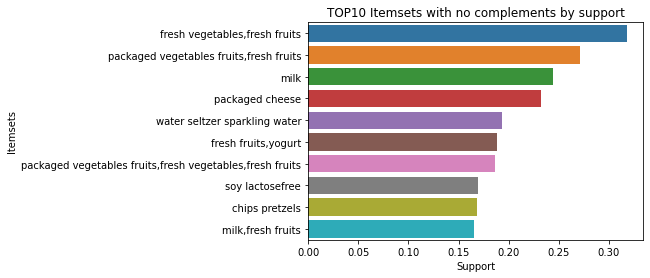

In [29]:
#top10 products that have no product complements
tbnocom_10=tbnocom.head(10)
ax = sns.barplot(x=list(tbnocom_10.support), y=list(tbnocom_10.itemsets))

plt.title('TOP10 Itemsets with no complements by support')
# Set x-axis label
plt.xlabel('Support')
# Set y-axis label
plt.ylabel('Itemsets')

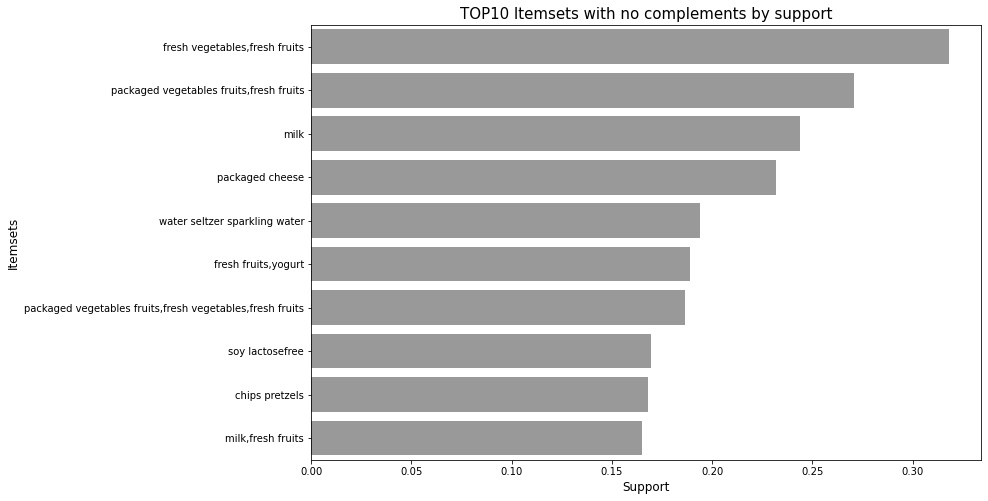

In [30]:
tbnocom_10=tbnocom.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=list(tbnocom_10.support), y=list(tbnocom_10.itemsets), alpha=0.8, color='gray')
plt.ylabel('Itemsets', fontsize=12)
plt.xlabel('Support', fontsize=12)
plt.title("TOP10 Itemsets with no complements by support", fontsize=15)
plt.show()